# STEP 6: Calculate zonal statistics

In order to evaluate the connection between vegetation health and
redlining, we need to summarize NDVI across the same geographic areas as
we have redlining information.

First, import variables from previous notebooks:

In [2]:
store -r denv_redlin_gdf denver_merged_das ndvi_dat

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import packages</div></div><div class="callout-body-container callout-body"><p>Some packages are included that will help you calculate statistics
for areas imported below. Add packages for:</p>
<ol type="1">
<li>Interactive plotting of tabular and vector data</li>
<li>Working with categorical data in <code>DataFrame</code>s</li>
</ol></div></div>

In [3]:
# Interactive plots with pandas
import hvplot.pandas
import pandas as pd #using Ordered categorical data
import regionmask # Convert shapefile to mask
from xrspatial import zonal_stats # Calculate zonal statistics

c:\Users\chrmq\miniconda3\envs\earth-analytics-python\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Convert vector to raster</div></div><div class="callout-body-container callout-body"><p>You can convert your vector data to a raster mask using the
<code>regionmask</code> package. You will need to give
<code>regionmask</code> the geographic coordinates of the grid you are
using for this to work:</p>
<ol type="1">
<li>Replace <code>gdf</code> with your redlining
<code>GeoDataFrame</code>.</li>
<li>Add code to put your <code>GeoDataFrame</code> in the same CRS as
your raster data.</li>
<li>Replace <code>x_coord</code> and <code>y_coord</code> with the x and
y coordinates from your raster data.</li>
</ol></div></div>

In [8]:
help(zonal_stats)

Help on function stats in module xrspatial.zonal:

stats(zones: xarray.core.dataarray.DataArray, values: xarray.core.dataarray.DataArray, zone_ids: Optional[List[Union[int, float]]] = None, stats_funcs: Union[Dict, List] = ['mean', 'max', 'min', 'sum', 'std', 'var', 'count'], nodata_values: Union[int, float] = None, return_type: str = 'pandas.DataFrame') -> Union[pandas.core.frame.DataFrame, dask.dataframe.core.DataFrame, xarray.core.dataarray.DataArray]
    Calculate summary statistics for each zone defined by a `zones`
    dataset, based on `values` aggregate.
    
    A single output value is computed for every zone in the input `zones`
    dataset.
    
    This function currently supports numpy backed, and dask with numpy backed
    xarray DataArrays.
    
    Parameters
    ----------
    zones : xr.DataArray
        zones is a 2D xarray DataArray of numeric values.
        A zone is all the cells in a raster that have the same value,
        whether or not they are contiguous. T

In [7]:
ndvi_dat.rio.crs

CRS.from_epsg(32613)

In [17]:
denv_redlin_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

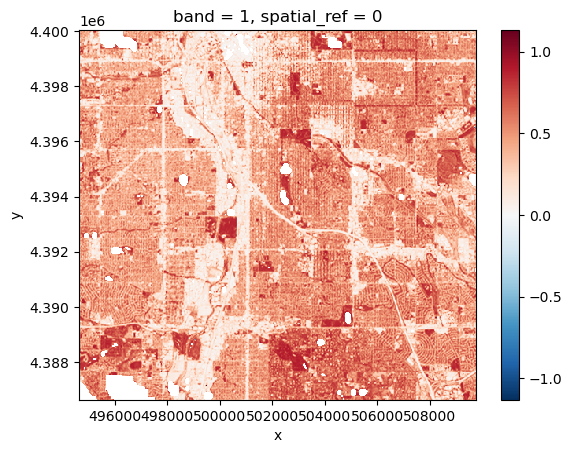

In [6]:
ndvi_dat.plot()

In [ ]:
ndvi_dat.head()
nf

<xarray.DataArray (y: 5, x: 5)> Size: 100B
array([[0.52324545, 0.47569358, 0.5083199 , 0.4701258 , 0.335369  ],
       [0.51418644, 0.42545062, 0.5068801 , 0.5288071 , 0.3947078 ],
       [0.4167376 , 0.36720416, 0.4432058 , 0.5157025 , 0.4812267 ],
       [0.36396396, 0.39975166, 0.43932268, 0.48289624, 0.49920338],
       [0.37496266, 0.52881753, 0.576638  , 0.52457607, 0.45843357]],
      dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 40B 4.947e+05 4.947e+05 ... 4.947e+05 4.948e+05
  * y            (y) float64 40B 4.4e+06 4.4e+06 4.4e+06 4.4e+06 4.4e+06
    spatial_ref  int64 8B 0

In [19]:
denv_redlin_gdf32613 = denv_redlin_gdf.to_crs(32613)

In [20]:
denver_redlining_mask = regionmask.mask_geopandas(
    denv_redlin_gdf32613,
    ndvi_dat.x, ndvi_dat.y,
    # The regions do not overlap
    overlap=False,
    # We're not using geographic coordinates
    wrap_lon=False
)

In [21]:
denver_redlining_mask.head()

<xarray.DataArray 'mask' (y: 5, x: 5)> Size: 200B
array([[  nan, 1129., 1129., 1129., 1129.],
       [  nan, 1129., 1129., 1129., 1129.],
       [  nan, 1129., 1129., 1129., 1129.],
       [  nan, 1129., 1129., 1129., 1129.],
       [  nan, 1129., 1129., 1129., 1129.]])
Coordinates:
    band         int64 8B 1
  * y            (y) float64 40B 4.4e+06 4.4e+06 4.4e+06 4.4e+06 4.4e+06
    spatial_ref  int64 8B 0
  * x            (x) float64 40B 4.947e+05 4.947e+05 ... 4.947e+05 4.948e+05
Attributes:
    standard_name:  region

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Calculate zonal statistics</div></div><div class="callout-body-container callout-body"><p>Calculate zonal status using the <code>zonal_stats()</code> function.
To figure out which arguments it needs, use either the
<code>help()</code> function in Python, or search the internet.</p></div></div>

In [22]:
# Calculate NDVI stats for each redlining zone
denver_ndvi_stats = zonal_stats(denver_redlining_mask, ndvi_dat)
denver_ndvi_stats

,zone,mean,max,min,sum,std,var,count
0,1103.0,0.594725,0.933680,0.051336,1084.184570,0.112025,0.012550,1823.0
1,1104.0,0.532335,0.751825,0.343143,264.038208,0.076069,0.005787,496.0
2,1105.0,0.551866,0.950300,0.034265,1221.832031,0.132201,0.017477,2214.0
3,1106.0,0.615817,0.880833,0.109626,289.433868,0.095491,0.009119,470.0
4,1107.0,0.578750,0.832567,0.069588,354.194824,0.116065,0.013471,612.0
5,1108.0,0.540381,0.834366,0.098866,412.851105,0.114857,0.013192,764.0
6,1109.0,0.577444,0.768556,0.110282,127.615219,0.095902,0.009197,221.0
7,1110.0,0.321796,0.870176,-0.009210,142.877594,0.132056,0.017439,444.0
8,1113.0,0.570884,0.913526,0.004126,504.661316,0.130895,0.017134,884.0
9,1114.0,0.409973,0.795624,-0.010747,523.535645,0.182436,0.033283,1277.0


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot regional statistics</div></div><div class="callout-body-container callout-body"><p>Plot the regional statistics:</p>
<ol type="1">
<li>Merge the NDVI values into the redlining
<code>GeoDataFrame</code>.</li>
<li>Use the code template below to convert the <code>grade</code> column
(<code>str</code> or <code>object</code> type) to an ordered
<code>pd.Categorical</code> type. This will let you use ordered color
maps with the grade data!</li>
<li>Drop all <code>NA</code> grade values.</li>
<li>Plot the NDVI and the redlining grade next to each other in linked
subplots.</li>
</ol></div></div>

In [25]:
denver_ndvi_stats.index
denv_redlin_gdf32613.index

Index([1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114,
       1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126,
       1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138,
       1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150,
       1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158],
      dtype='int64')

In [27]:
# Merge the NDVI stats with redlining geometry into one `GeoDataFrame`
denv_ndvi_merged = denv_redlin_gdf32613.merge(denver_ndvi_stats.set_index('zone'),
                                              left_index=True, right_index=True)

In [47]:
denv_ndvi_merged.crs

<Projected CRS: EPSG:32613>
Name: WGS 84 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 108°W and 102°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Northwest Territories (NWT); Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-108.0, 0.0, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
denv_ndvi_merged_merc = denv_ndvi_merged.to_crs("epsg:3395")

In [ ]:

# Change grade to ordered Categorical for plotting
denv_ndvi_merged.grade = pd.Categorical(
    denv_ndvi_merged.grade,
    ordered=True,
    categories=['A', 'B', 'C', 'D']
)

# Drop rows with NA grades
denv_ndvi_merged = denv_ndvi_merged.dropna()




:Layout
   .Polygons.I  :Polygons   [Longitude,Latitude]   (mean)
   .Polygons.II :Polygons   [Longitude,Latitude]   (grade)

In [ ]:
# Plot NDVI and redlining grade in linked subplots
(
    denv_ndvi_merged.hvplot(c='mean', geo=True, cmap='Greens')
    +
    denv_ndvi_merged.hvplot(c='grade', geo=True, cmap='cet_cwr')
)

:Layout
   .Polygons.I  :Polygons   [Longitude,Latitude]   (mean)
   .Polygons.II :Polygons   [Longitude,Latitude]   (grade)

In [10]:
store denver_ndvi_gdf